In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from keras.models import Sequential
from keras.layers import Cropping2D, Lambda, Dropout, ELU
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def build_model(og_img_shape):

    model = Sequential()

    model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape = og_img_shape))

    model.add(Conv2D(24, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(36, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(48, (5,5), strides=(2, 2), padding='same', activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))

    model.add(Conv2D(64, (3,3), strides=(1, 1), padding='valid', activation='elu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(100, activation = 'elu'))
    model.add(Dense(50, activation = 'elu'))
    model.add(Dense(10, activation = 'elu'))
    model.add(Dense(1))

    model.summary()

    return model

Using TensorFlow backend.


In [60]:
model.save_weights('deepracer_weights.h5')

In [26]:
a = np.load('/Users/saurabh7/Downloads/123.npz')

In [27]:
train = a['a']

In [28]:
labels = a['b']

In [29]:
train

array([[[[179, 179, 179],
         [179, 179, 179],
         [179, 179, 179],
         ...,
         [179, 179, 179],
         [179, 179, 179],
         [179, 179, 179]],

        [[179, 179, 179],
         [179, 179, 179],
         [179, 179, 179],
         ...,
         [179, 179, 179],
         [179, 179, 179],
         [179, 179, 179]],

        [[179, 179, 179],
         [179, 179, 179],
         [179, 179, 179],
         ...,
         [179, 179, 179],
         [179, 179, 179],
         [179, 179, 179]],

        ...,

        [[122, 126, 139],
         [122, 126, 139],
         [121, 126, 138],
         ...,
         [115, 119, 132],
         [115, 119, 132],
         [115, 119, 132]],

        [[121, 126, 138],
         [121, 126, 138],
         [121, 126, 138],
         ...,
         [115, 119, 132],
         [115, 119, 132],
         [115, 119, 132]],

        [[121, 126, 138],
         [121, 126, 138],
         [121, 125, 138],
         ...,
         [115, 119, 132],
        

In [10]:
labels

(1550, 1)

In [5]:
import matplotlib.pyplot as plt
import cv2

In [61]:
# img = cv2.imread('racetrack.jpg')

In [62]:
# plt.imshow(cv2.imread('racetrack.jpg'))

In [63]:
# img.shape

In [49]:
model = build_model((train.shape[1], train.shape[2], train.shape[3]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 480, 640, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 24)      1824      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 24)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 80, 36)        21636     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 40, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 20, 48)        43248     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 10, 48)        

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

In [51]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [52]:
model.fit(X_train,y_train,validation_data=[X_test, y_test], epochs=3)

Train on 1240 samples, validate on 310 samples
Epoch 1/3
1240/1240 [==============================] - 54s 43ms/step - loss: 0.1098 - val_loss: 0.0117
Epoch 2/3
1240/1240 [==============================] - 50s 40ms/step - loss: 0.0131 - val_loss: 0.0095
Epoch 3/3
1240/1240 [==============================] - 48s 39ms/step - loss: 0.0103 - val_loss: 0.0106


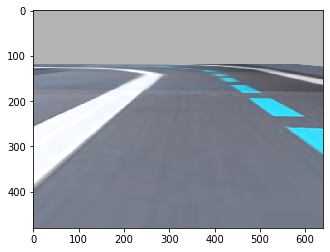

In [44]:
plt.imshow(X_train[6,:,:,:])

In [45]:
print(y_train[6])

[-0.08]


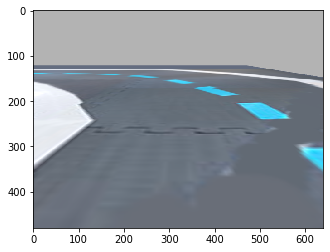

In [56]:
plt.imshow(X_test[4,:,:,:])

In [57]:
model.predict(X_test[4,:,:,:].reshape(-1, train.shape[1], train.shape[2], train.shape[3] ))

array([[-0.02840356]], dtype=float32)

In [58]:
model.save('deepracer_model.h5')

In [64]:
# img.reshape(1, 342, 608, 3)